# OBJETIVO: Predecir si un paciente tendra un reingreso luego de su alta apartir de su condicion medica.
<br> <br/>
### **Problematica**
*Se ha observado que la tasa de reingresos hospitalarios es una cuestión crucial en la salud pública debido a sus impactos significativos en el sistema de atencion y en los residentes. La falta de identificación precisa de las causas subyacentes de los reingresos puede llevar a una serie de problemas que afectan tanto la eficiencia del sistema de salud como el bienestar del paciente. Por lo tanto en el siguiente analisis se abordara esta tematica y se buscara identificar las causas tanto como desarrollar un marco predictivo para su prevencion.*
<br> <br/>
### **Marco estrategico**
*La Dirección Médica de la localidad tiene como objetivo desarrollar un modelo predictivo para anticipar la probabilidad de reingreso hospitalario de pacientes, basado en sus condiciones médicas. El modelo utilizará datos de hospitales dentro de su jurisdicción con el fin de:*

*1. **Mejorar la Calidad de Vida de los habitantes**: Implementar intervenciones personalizadas para pacientes con alto riesgo de reingreso, optimizando el manejo postalta y previniendo hospitalizaciones repetidas.*

*2. **Optimizar el Uso de Recursos Sanitarios**: Mejorar la eficiencia en la gestión de recursos hospitalarios, reduciendo costos asociados y evitando la saturación de los servicios de atención médica.*

*3. **Incrementar la Calidad de Atención**: Desarrollar estrategias de atención basadas en los resultados del modelo para garantizar una transición más efectiva del paciente desde el hospital a su entorno de cuidado continuo.*
<br> <br/>
### **Marco analitico**
*Para poder desarrollar el modelo se abarca el registro de atencion de diferentes hospitales de la juridiccion en el cual se aportan las siguientes variables:*

1. Nombre
2. Edad
3. Genero
4. Tipo de sangre
5. Condicion medica
6. Fecha de ingreso
7. Doctor
8. Hospital
9. Cobertura de salud
10. Costo de atencion
11. Numero de habitacion
12. Tipo de ingreso
13. Fecha de alta
14. Medicacion prescripta
15. Resultados de examenes
<br> <br/>
## **ACLARACION**
*Los datos analizados son extraidos de un archivo CSV de la pagina [Kaggle](https://www.Kaggle.com) , los mismos fueron generados con la libreria Faker de python. Son datos de origen sinteticos con fines educativos y de investigacion.*

# **PRIMER PASO**

1. Exportamos la librerias que utilizaremos durante el analisis.
2. Exportamos el dataset.
3. Mostramos y analizamos el dataset.

In [28]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [29]:
# Levanto el dataset
url = 'https://raw.githubusercontent.com/franvg99/proyectodscoder/main/healthcare_prediction_dataset.csv'
df = pd.read_csv(url, sep = ',')
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [30]:
# Analizamos el contenido del dataset
df.shape

(55500, 15)

# **SEGUNDO PASO**
*Realizamos una primera correccion del df y empezamos a recorrerlo*

In [31]:
# Primero corregimos los errores de redaccion en la columna "Name"

df["Name"] = df["Name"].str.title()

# Mostramos el resultado

df[["Name"]].head()

,Name
0,Bobby Jackson
1,Leslie Terry
2,Danny Smith
3,Andrew Watts
4,Adrienne Bell


In [32]:
# Creo una nueva columna ID_Admission
df["ID_Admission"] = range(1, len(df) + 1)

# Establecemos ID_Admission como el nuevo índice
df = df.set_index("ID_Admission")

df[["Name"]].head()

,Name
ID_Admission,
1,Bobby Jackson
2,Leslie Terry
3,Danny Smith
4,Andrew Watts
5,Adrienne Bell


In [33]:
# Vemos el número de valores nulos por columna
print(df.isnull().sum())


Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64


### *No hay valores nulos en nuestro df*

In [34]:
# Contamos cuántas veces se repite cada paciente en la columna 'Name'
readmission = df['Name'].value_counts().reset_index()

# Renombramos las columnas para mayor claridad
readmission.columns = ['Name', 'Readmissions']

# Visualizamos
print(readmission)

                   Name  Readmissions
0      Michael Williams            24
1         Michael Smith            23
2          Robert Smith            22
3           James Brown            19
4           James Smith            18
...                 ...           ...
40230     Carl Chandler             1
40231    Bradley Daniel             1
40232      Lisa Simpson             1
40233     Roger Farrell             1
40234  Michelle Daniels             1

[40235 rows x 2 columns]


In [35]:
# Convertimos las fechas de admisión y alta a formato datetime
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

# Creamos una nueva columna con los días de hospitalización
df['Days_Hospitalization'] = (df['Discharge Date'] - df['Date of Admission']).dt.days

# Visualizamos resultados
df[["Days_Hospitalization"]].head()


,Days_Hospitalization
ID_Admission,
1,2
2,6
3,15
4,30
5,20


In [36]:
# Creamos una columna con los días hasta el siguiente ingreso
df['Days_to_Next_Admission'] = df.groupby('Name')['Date of Admission'].diff().dt.days

# Rellenamos los valores NaN con un valor numerico
df['Days_to_Next_Admission'] = df['Days_to_Next_Admission'].fillna(0)  # 0 días significa sin reingreso

# Visualizamos algunos datos mayores a 0
df[df['Days_to_Next_Admission'] > 0].head()


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Days_Hospitalization,Days_to_Next_Admission
ID_Admission,,,,,,,,,,,,,,,,,
1413,Amanda Wilson,31,Male,B-,Hypertension,2021-07-23,Susan Clark,Howe-Mitchell,UnitedHealthcare,28062.078133,222,Elective,2021-08-13,Ibuprofen,Abnormal,21,188.0
1484,Christina Miller,80,Male,O+,Obesity,2020-09-16,Mark Ewing,"Aguilar Mullins and Schmidt,",Cigna,27670.952002,330,Elective,2020-10-13,Ibuprofen,Abnormal,27,377.0
1608,Michael Gomez,78,Male,AB+,Hypertension,2021-07-26,Scott Collins,"Stevens, and Keller Martin",Medicare,44063.007945,289,Elective,2021-08-07,Aspirin,Normal,12,289.0
1625,Emma Bennett,38,Male,AB+,Arthritis,2023-07-20,Walter Erickson,LLC Simpson,Cigna,9708.662935,203,Urgent,2023-08-10,Penicillin,Abnormal,21,887.0
1667,Michael Campbell,19,Male,B-,Arthritis,2022-03-26,Paul Kaiser,Morgan-Perez,UnitedHealthcare,5844.077673,146,Urgent,2022-04-21,Paracetamol,Inconclusive,26,60.0


In [37]:
# Obtenemos el periodo del estudio.
first_admission_date = df['Date of Admission'].min()
last_discharge_date = df['Discharge Date'].max()

# Visualisamos
print("Primera fecha de admisión:", first_admission_date)
print("Última fecha de alta:", last_discharge_date)

Primera fecha de admisión: 2019-05-08 00:00:00
Última fecha de alta: 2024-06-06 00:00:00


# **TERCER PASO**
### *Creando nuestro primer analisis grafico y tratando con los primeros outliners*
*Comenzamos a utilizar las herramientas que nos ofrece matplotlib y seaborn para realizar un analisis mas profundo de nuestros datos. Tambien realizamos tratamiento de outliners para todos aquellos datos que escapan de nuestro rango IQR.*

*El tratamiento de outliers es porque las fecha de inicio y finalizacion del estudio no son al inicio de cada mes, por lo tanto, falta data en el primer y ultimo mes.*


### ANALISIS DE ADMISIONES

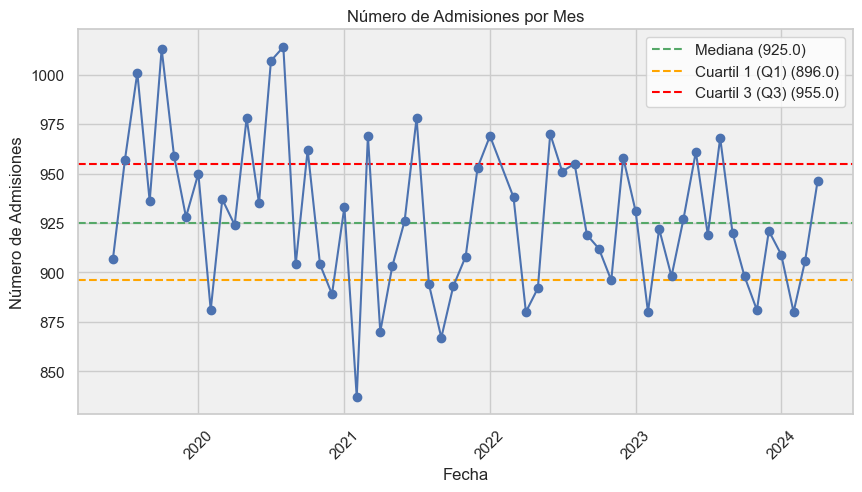

In [38]:
# Agrupamos por mes y contamos el número de admisiones
monthly_admissions = df.groupby(df['Date of Admission'].dt.to_period('M')).size().reset_index(name='Number of Admissions')

# Convertimos la columna de periodos a timestamps para poder graficar
monthly_admissions['Date of Admission'] = monthly_admissions['Date of Admission'].dt.to_timestamp()

# Identificamos los outliers usando el rango intercuartílico (IQR)
Q1 = monthly_admissions['Number of Admissions'].quantile(0.25)
Q3 = monthly_admissions['Number of Admissions'].quantile(0.75)
IQR = Q3 - Q1

# Definimos los límites para detectar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtramos las admisiones que están dentro del rango no considerado outlier
monthly_admissions_filtered = monthly_admissions[
    (monthly_admissions['Number of Admissions'] >= lower_bound) &
    (monthly_admissions['Number of Admissions'] <= upper_bound)]

# Calculamos la mediana de las admisiones
median_admissions = monthly_admissions_filtered['Number of Admissions'].median()

# Graficamos los datos sin outliers
plt.figure(figsize=(10, 5))

# Cambiamos el color de fondo a un gris suave
ax = plt.gca()
ax.set_facecolor('#f0f0f0')

# Trazamos la mediana
plt.axhline(median_admissions, color='g', linestyle='--', label=f'Mediana ({median_admissions})')

# Trazamos las líneas de los cuartiles (Q1 y Q3)
plt.axhline(Q1, color='orange', linestyle='--', label=f'Cuartil 1 (Q1) ({Q1})')
plt.axhline(Q3, color='red', linestyle='--', label=f'Cuartil 3 (Q3) ({Q3})')

# Creamos la línea de admisiones filtradas
plt.plot(monthly_admissions_filtered['Date of Admission'],
         monthly_admissions_filtered['Number of Admissions'],
         marker='o', color='b', linestyle='-')

# Títulos y etiquetas
plt.title('Número de Admisiones por Mes')
plt.xlabel('Fecha')
plt.ylabel('Número de Admisiones')
plt.xticks(rotation=45)
plt.grid(True)

# Mostramos leyendas
plt.legend()

# Visualisamos el gráfico
plt.show()


### ANALISIS DE READMISIONES

C:\Users\Win10\AppData\Local\Temp\ipykernel_296\2049103221.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  repeated_patients['Admission Month'] = repeated_patients['Date of Admission'].dt.to_period('M')


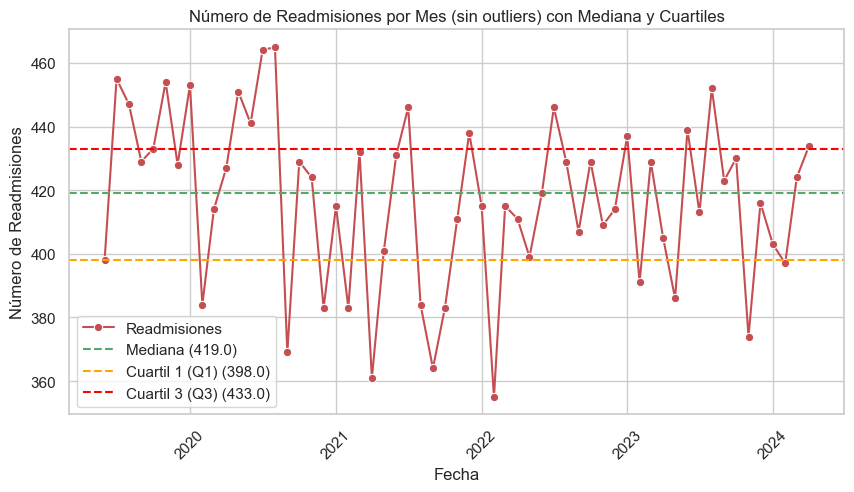

In [39]:
# Creamos una variable que identifique a los pacientes con más de una admisión
readmissions = df.groupby('Name').size()

# Filtramos solo los pacientes que tienen más de una admisión (readmisiones)
readmission_patients = readmissions[readmissions > 1].index
repeated_patients = df[df['Name'].isin(readmission_patients)]

# Agrupamos las readmisiones por mes
repeated_patients['Admission Month'] = repeated_patients['Date of Admission'].dt.to_period('M')
monthly_readmissions = repeated_patients.groupby('Admission Month').size().reset_index(name='Number of Readmissions')

# Convertimos a tipo timestamp para graficar
monthly_readmissions['Admission Month'] = monthly_readmissions['Admission Month'].dt.to_timestamp()

# Tratamiento de outliers usando IQR (rango intercuartílico)
Q1 = monthly_readmissions['Number of Readmissions'].quantile(0.25)
Q3 = monthly_readmissions['Number of Readmissions'].quantile(0.75)
IQR = Q3 - Q1

# Definimos los límites para identificar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtramos los datos eliminando los outliers
monthly_readmissions_filtered = monthly_readmissions[
    (monthly_readmissions['Number of Readmissions'] >= lower_bound) &
    (monthly_readmissions['Number of Readmissions'] <= upper_bound)]

# Calculamos la mediana de las readmisiones
median_readmissions = monthly_readmissions_filtered['Number of Readmissions'].median()

# Configuramos el estilo de Seaborn
sns.set(style="whitegrid")

# Graficamos las readmisiones por mes (sin outliers)
plt.figure(figsize=(10, 5))

# Creamos la línea de readmisiones filtradas (sin outliers)
sns.lineplot(x='Admission Month', y='Number of Readmissions', data=monthly_readmissions_filtered, marker='o', color='r', label='Readmisiones')

# Trazamos la mediana
plt.axhline(median_readmissions, color='g', linestyle='--', label=f'Mediana ({median_readmissions})')

# Trazamos las líneas de los cuartiles (Q1 y Q3)
plt.axhline(Q1, color='orange', linestyle='--', label=f'Cuartil 1 (Q1) ({Q1})')
plt.axhline(Q3, color='red', linestyle='--', label=f'Cuartil 3 (Q3) ({Q3})')

# Títulos y etiquetas
plt.title('Número de Readmisiones por Mes (sin outliers) con Mediana y Cuartiles')
plt.xlabel('Fecha')
plt.ylabel('Número de Readmisiones')
plt.xticks(rotation=45)

# Mostramos la leyenda
plt.legend()

# Mostramos el gráfico
plt.show()


# *COMPARACION DE AMBOS GRAFICOS*

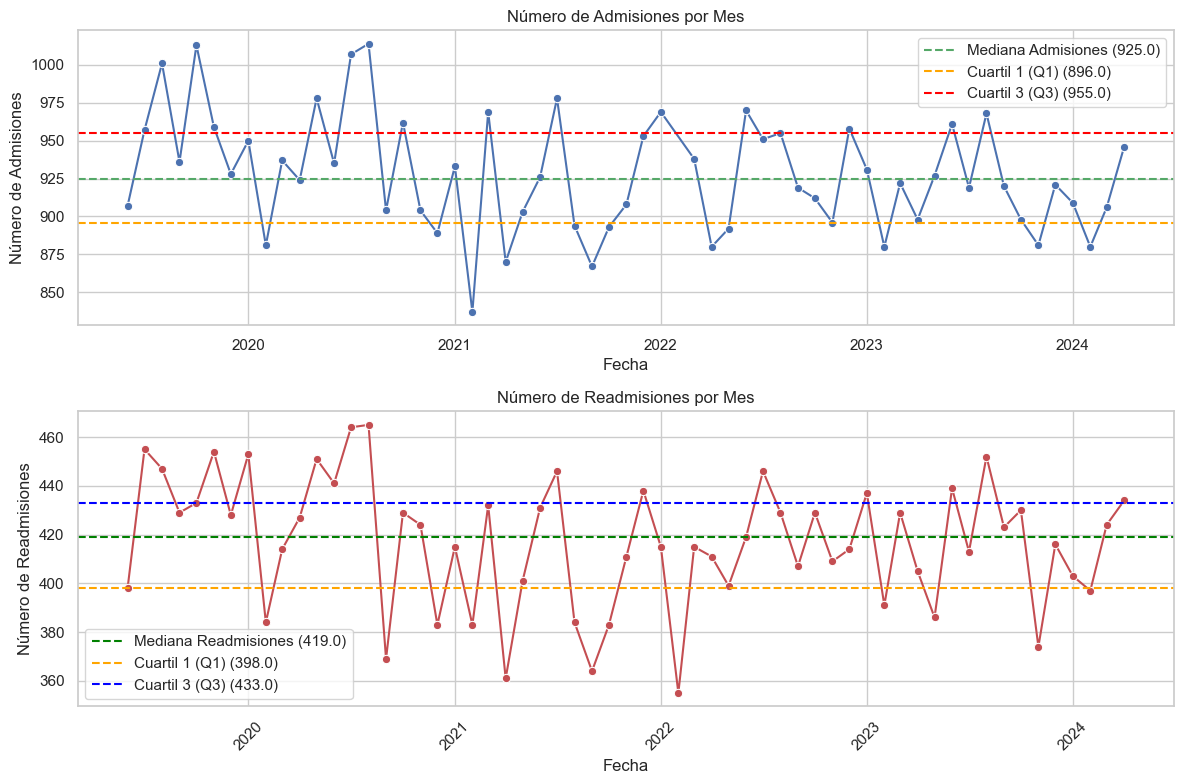

In [40]:
# ===================== Admisiones ===================== #

# Tratamiento de outliers usando IQR (rango intercuartílico)
Q1_adm = monthly_admissions['Number of Admissions'].quantile(0.25)
Q3_adm = monthly_admissions['Number of Admissions'].quantile(0.75)
IQR_adm = Q3_adm - Q1_adm
lower_bound_adm = Q1_adm - 1.5 * IQR_adm
upper_bound_adm = Q3_adm + 1.5 * IQR_adm

# Filtramos las admisiones sin outliers
monthly_admissions_filtered = monthly_admissions[
    (monthly_admissions['Number of Admissions'] >= lower_bound_adm) &
    (monthly_admissions['Number of Admissions'] <= upper_bound_adm)]

# Calculamos la mediana de las admisiones
median_admissions = monthly_admissions_filtered['Number of Admissions'].median()

# ===================== Readmisiones ===================== #

# Tratamiento de outliers usando IQR (rango intercuartílico)
Q1_readm = monthly_readmissions['Number of Readmissions'].quantile(0.25)
Q3_readm = monthly_readmissions['Number of Readmissions'].quantile(0.75)
IQR_readm = Q3_readm - Q1_readm
lower_bound_readm = Q1_readm - 1.5 * IQR_readm
upper_bound_readm = Q3_readm + 1.5 * IQR_readm

# Filtramos las readmisiones sin outliers
monthly_readmissions_filtered = monthly_readmissions[
    (monthly_readmissions['Number of Readmissions'] >= lower_bound_readm) &
    (monthly_readmissions['Number of Readmissions'] <= upper_bound_readm)]

# Calculamos la mediana de las readmisiones
median_readmissions = monthly_readmissions_filtered['Number of Readmissions'].median()

# ===================== Gráficos Comparativos ===================== #

# Creamos subgráficos
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

# Configuramos el estilo de Seaborn
sns.set(style="whitegrid")

# ===== Subgráfico 1: Admisiones ===== #
sns.lineplot(x='Date of Admission', y='Number of Admissions', data=monthly_admissions_filtered, marker='o', color='b', ax=axes[0])
axes[0].axhline(median_admissions, color='g', linestyle='--', label=f'Mediana Admisiones ({median_admissions})')
axes[0].axhline(Q1_adm, color='orange', linestyle='--', label=f'Cuartil 1 (Q1) ({Q1_adm})')
axes[0].axhline(Q3_adm, color='red', linestyle='--', label=f'Cuartil 3 (Q3) ({Q3_adm})')
axes[0].set_title('Número de Admisiones por Mes')
axes[0].set_ylabel('Número de Admisiones')
axes[0].set_xlabel('Fecha')
axes[0].legend()

# ===== Subgráfico 2: Readmisiones ===== #
sns.lineplot(x='Admission Month', y='Number of Readmissions', data=monthly_readmissions_filtered, marker='o', color='r', ax=axes[1])
axes[1].axhline(median_readmissions, color='green', linestyle='--', label=f'Mediana Readmisiones ({median_readmissions})')
axes[1].axhline(Q1_readm, color='orange', linestyle='--', label=f'Cuartil 1 (Q1) ({Q1_readm})')
axes[1].axhline(Q3_readm, color='blue', linestyle='--', label=f'Cuartil 3 (Q3) ({Q3_readm})')
axes[1].set_title('Número de Readmisiones por Mes')
axes[1].set_ylabel('Número de Readmisiones')
axes[1].set_xlabel('Fecha')
axes[1].legend()

# Ajustamos etiquetas y formato
plt.xticks(rotation=45)
plt.tight_layout()

# Mostramos el gráfico
plt.show()


# CONCLUSION DEL ANALISIS EN GENERAL

*Al realizar este primer analisis comparativo entre admisiones y readmisiones podemos ver a simple vista como ambas variables se comportan de maneras similares, es decir, si el numero de admisiones sube tambien lo hacen las readmisiones.*
<Br><Br/>
*Con esto podemos llegar a nuestras primeras conclusiones:*

1. Se debe evaluar la calidad del tratamiento empleado tanto como recursos que tambien se utilizaron.
2. Se debe evaluar la posibilidad de altas fuera de termino, unificando un criterio mas estricto.
3. Se debe emplear un control mas regular de los pacientes externados.
<Br><Br/>

*Este analisis general nos lleva a orientar nuestro esfuerzo analitico en un nuevo analisis especifico de los pacientes:*

1. Evaluaremos las condiciones medicas.
2. Evaluaremos dichas condiciones por el genero.
3. Evaluaremos la condicion del paciente en relacion al tratamiento empleado y su efectividad.

*Todo este analisis sera unificado y relacionado con la readmision del paciente*

# CUARTO PASO

## *Analisis especifico*

### ANALISIS SEGUN CONDICION MEDICA

In [41]:
# Agrupamos por condición médica y contamos las admisiones
admission_by_condition = df.groupby('Medical Condition').size().reset_index(name='Number of Admissions')

# Ordenamos de mayor a menor número de admisiones
admission_by_condition = admission_by_condition.sort_values(by='Number of Admissions', ascending=False)

# Mostramos el resultado
print(admission_by_condition)


  Medical Condition  Number of Admissions
0         Arthritis                  9308
3          Diabetes                  9304
4      Hypertension                  9245
5           Obesity                  9231
2            Cancer                  9227
1            Asthma                  9185


In [42]:
# Agrupamos por diagnóstico médico y contamos las readmisiones
readmission_by_condition = repeated_patients.groupby('Medical Condition').size().reset_index(name='Number of Readmissions')

# Ordenamos de mayor a menor número de readmisiones
readmission_by_condition = readmission_by_condition.sort_values(by='Number of Readmissions', ascending=False)

print(readmission_by_condition)

  Medical Condition  Number of Readmissions
5           Obesity                    4216
1            Asthma                    4205
4      Hypertension                    4198
2            Cancer                    4161
3          Diabetes                    4118
0         Arthritis                    4107


C:\Users\Win10\AppData\Local\Temp\ipykernel_296\2230960266.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Number of Admissions', y='Medical Condition', data=comparison_df, ax=axes[0], palette='Blues_d')
C:\Users\Win10\AppData\Local\Temp\ipykernel_296\2230960266.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Number of Readmissions', y='Medical Condition', data=comparison_df, ax=axes[1], palette='Reds_d')


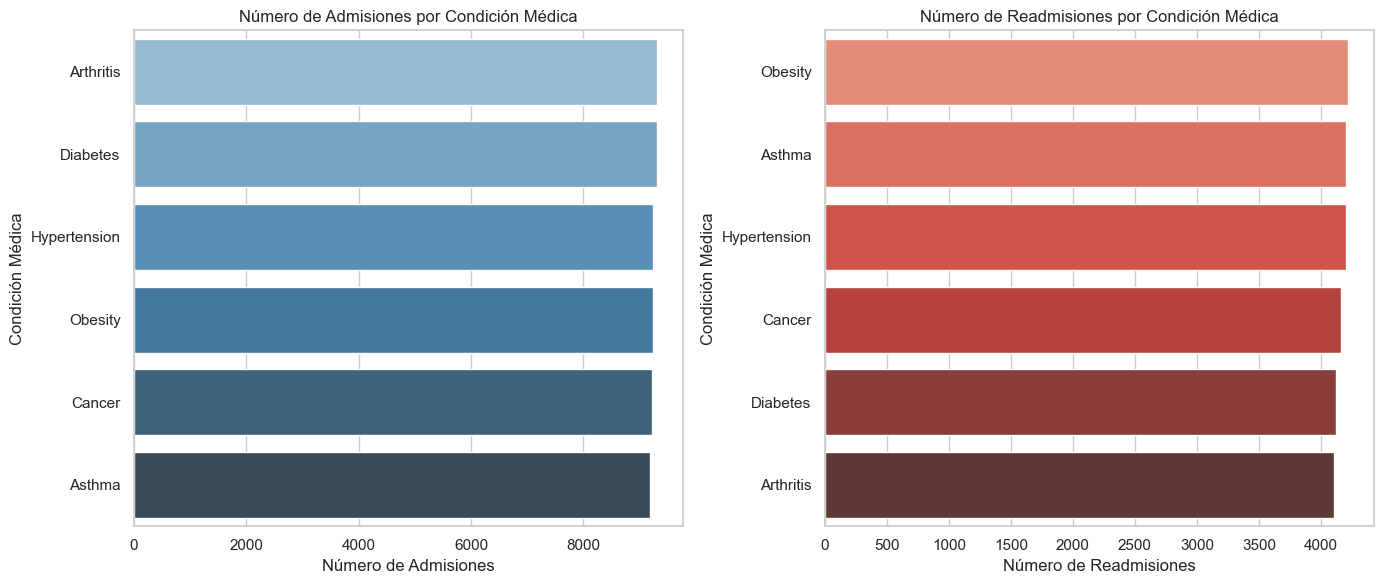

In [43]:
# Unimos ambos DataFrames por "Medical Condition"
comparison_df = pd.merge(admission_by_condition, readmission_by_condition, on='Medical Condition', how='outer').fillna(0)

# Ordenamos por el número de admisiones de mayor a menor
comparison_df = comparison_df.sort_values(by='Number of Admissions', ascending=False)

# Configuramos el tamaño del gráfico
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Graficamos admisiones
sns.barplot(x='Number of Admissions', y='Medical Condition', data=comparison_df, ax=axes[0], palette='Blues_d')
axes[0].set_title('Número de Admisiones por Condición Médica')
axes[0].set_xlabel('Número de Admisiones')
axes[0].set_ylabel('Condición Médica')

# Ordenamos el DataFrame según el número de readmisiones de mayor a menor
comparison_df = comparison_df.sort_values(by='Number of Readmissions', ascending=False)

# Graficamos readmisiones usando el nuevo orden
sns.barplot(x='Number of Readmissions', y='Medical Condition', data=comparison_df, ax=axes[1], palette='Reds_d')
axes[1].set_title('Número de Readmisiones por Condición Médica')
axes[1].set_xlabel('Número de Readmisiones')
axes[1].set_ylabel('Condición Médica')

# Ajustamos la presentación
plt.tight_layout()
plt.show()


### **PRIMER ANALISIS ESPECIFICO: CONDICION MEDICA**

*El resultado del primer analisis nos muestra una relacion muy semejante, casi iguales entre cada condicion medica. Salvo que la primer condicion medica para la admision es la "Artritis" y para las readmisiones es la "Obesisdad."*

*Esto nos demuestra que aquel que padece artritis es mas propenso a la admision hospitalaria, pero aquel que padece obesidad es mas propenso a la readmision luego de su alta medica*.

### ANALISIS SEGUN GENERO

In [44]:
# Agrupamos por sexo y contar las admisiones
admission_by_sex = df.groupby('Gender').size().reset_index(name='Number of Admissions')

# Ordenamos de mayor a menor número de admisiones
admission_by_sex = admission_by_sex.sort_values(by='Number of Admissions', ascending=False)

# Mostramos el resultado
print(admission_by_sex)


   Gender  Number of Admissions
1    Male                 27774
0  Female                 27726


In [45]:
# Filtramos solo los pacientes con más de una admisión (readmisiones)
readmission_patients = df[df['Name'].isin(df.groupby('Name').filter(lambda x: len(x) > 1)['Name'])]

# Agrupamos por sexo y contar las readmisiones
readmission_by_sex = readmission_patients.groupby('Gender').size().reset_index(name='Number of Readmissions')

# Ordenamos de mayor a menor número de readmisiones
readmission_by_sex = readmission_by_sex.sort_values(by='Number of Readmissions', ascending=False)

# Mostramos el resultado
print(readmission_by_sex)


   Gender  Number of Readmissions
1    Male                   12614
0  Female                   12391


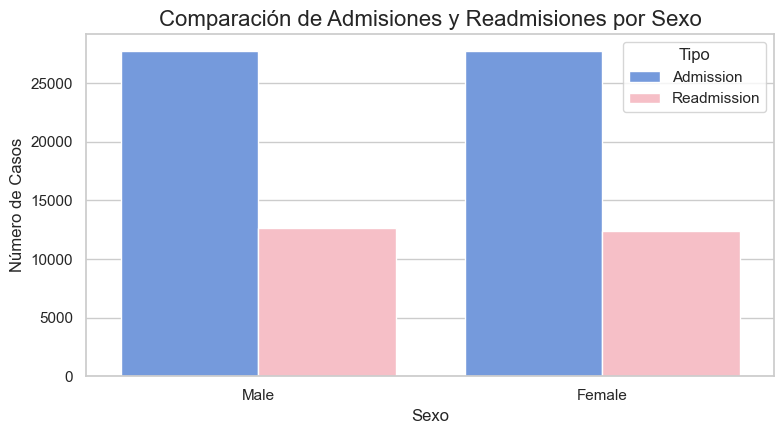

In [46]:
# Creamos un DataFrame combinado para admisiones y readmisiones
combined_data = pd.DataFrame({
    'Gender': admission_by_sex['Gender'].tolist() + readmission_by_sex['Gender'].tolist(),
    'Count': admission_by_sex['Number of Admissions'].tolist() + readmission_by_sex['Number of Readmissions'].tolist(),
    'Type': ['Admission'] * len(admission_by_sex) + ['Readmission'] * len(readmission_by_sex)
})

# Definimos colores personalizados
colors = {
    'Admission': '#6495ED',
    'Readmission': '#FFB6C1'
}

# Graficamos
plt.figure(figsize=(8, 4.5))
sns.barplot(x='Gender', y='Count', hue='Type', data=combined_data, palette=colors)

# Títulos y etiquetas
plt.title('Comparación de Admisiones y Readmisiones por Sexo', fontsize=16)
plt.xlabel('Sexo', fontsize=12)
plt.ylabel('Número de Casos', fontsize=12)
plt.legend(title='Tipo', loc='upper right')

# Mostramos el gráfico
plt.tight_layout()
plt.show()


### **SEGUNDO ANALISIS ESPECIFICO: GENERO**

*El análisis de las admisiones y readmisiones por genero revela un patrón notablemente similar entre ambos grupos, lo que sugiere que no hay una disparidad significativa en la frecuencia de atención médica basada en el género.*

### ANALISIS SEGUN MEDICACION.

In [47]:
# Agrupamos por medicamento y contar las admisiones
admission_by_medication = df.groupby('Medication').size().reset_index(name='Number of Admissions')

# Ordenamos de mayor a menor número de admisiones
admission_by_medication = admission_by_medication.sort_values(by='Number of Admissions', ascending=False)

# Mostramos el resultado
print(admission_by_medication)



    Medication  Number of Admissions
2      Lipitor                 11140
1    Ibuprofen                 11127
0      Aspirin                 11094
3  Paracetamol                 11071
4   Penicillin                 11068


In [48]:
# Agrupamos por medicamento y contamos las readmisiones
readmission_by_medication = df.groupby('Medication').size().reset_index(name='Number of Readmissions')

# Ordenamos de mayor a menor número de readmisiones
readmission_by_medication = readmission_by_medication.sort_values(by='Number of Readmissions', ascending=False)

# Mostrar el resultado
print(readmission_by_medication)

    Medication  Number of Readmissions
2      Lipitor                   11140
1    Ibuprofen                   11127
0      Aspirin                   11094
3  Paracetamol                   11071
4   Penicillin                   11068


C:\Users\Win10\AppData\Local\Temp\ipykernel_296\336516997.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Number of Readmissions', y='Medication', data=condition_data, ax=ax, palette='Set2')
C:\Users\Win10\AppData\Local\Temp\ipykernel_296\336516997.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(condition_data['Medication'], rotation=0)
C:\Users\Win10\AppData\Local\Temp\ipykernel_296\336516997.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Number of Readmissions', y='Medication', data=condition_data, ax=ax, palette='Set2')
C:\Users\Win10\AppData\Local\Temp\ipykernel_

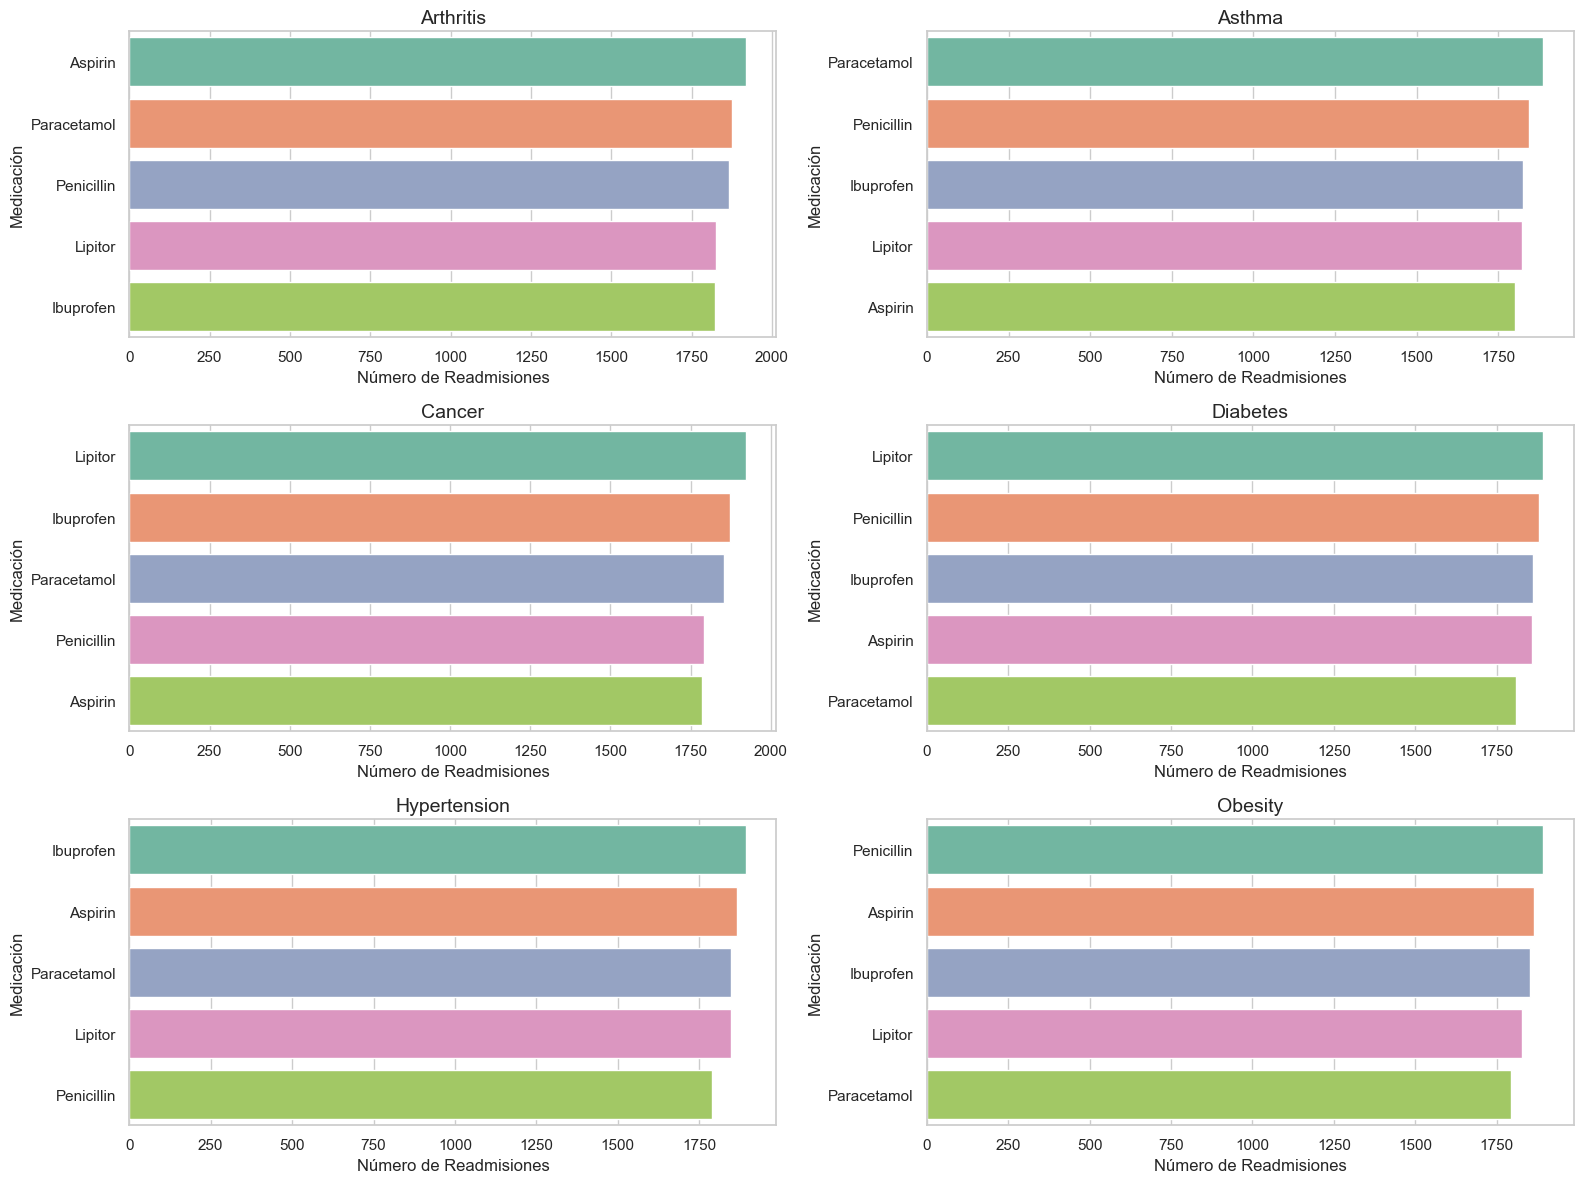

In [49]:
# Agrupamos por condición médica y medicación, y contar las readmisiones
readmission_by_medication_condition = df.groupby(['Medical Condition', 'Medication']).size().reset_index(name='Number of Readmissions')

# Obtenemos las condiciones médicas únicas
medical_conditions = readmission_by_medication_condition['Medical Condition'].unique()

# Configuramos el tamaño de la figura con un límite de 2 gráficos por línea
n_conditions = len(medical_conditions)
ncols = 2  # Definir 2 gráficos por fila
nrows = (n_conditions // ncols) + (n_conditions % ncols > 0)  # Calcular el número de filas necesarias

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(8 * ncols, 4 * nrows))

# Aplanamos los ejes en caso de que sean múltiples filas/columnas
axes = axes.flatten()

# Creamos subgráficos para cada condición médica
for ax, condition in zip(axes, medical_conditions):
    condition_data = readmission_by_medication_condition[readmission_by_medication_condition['Medical Condition'] == condition]

    # Ordenamos por número de readmisiones en orden decreciente
    condition_data = condition_data.sort_values(by='Number of Readmissions', ascending=False)

    # Graficamos
    sns.barplot(x='Number of Readmissions', y='Medication', data=condition_data, ax=ax, palette='Set2')
    ax.set_title(condition, fontsize=14)
    ax.set_xlabel('Número de Readmisiones', fontsize=12)
    ax.set_ylabel('Medicación', fontsize=12)

    # Reordenamos etiquetas del eje y
    ax.set_yticklabels(condition_data['Medication'], rotation=0)

# Eliminamos los ejes vacíos si hay menos gráficos que espacios asignados
for ax in axes[len(medical_conditions):]:
    fig.delaxes(ax)

# Ajustamos el layout
plt.tight_layout()
plt.show()


### TERCER ANALISIS ESPECIFICO: POR MEDICACION

*Se identifican patrones claros en el número de readmisiones para diferentes medicamentos. Algunas condiciones médicas muestran un número levemente mayor de readmisiones asociado a ciertas medicaciones, lo que podría sugerir la efectividad o los efectos secundarios de esos tratamientos.*

# CONCLUSION DEL ANALISIS ESPECIFICO

*El análisis visual de las diferentes variables en los gráficos generados ha permitido obtener una comprensión más profunda de las dinámicas de admisiones y readmisiones en el contexto de las condiciones médicas y los tratamientos utilizados. No tanto fue asi con el genero, que dio un resultado casi igual. Por lo que luego del analisis de estos datos proporsionados nos orientan a unificar esfuerzos en las condiciones y el medicamento proporcionado por el personal medico.*

*La observación de patrones de readmisiones sugiere que muchos pacientes pueden no estar recibiendo la educación y el soporte adecuados para manejar su salud después del alta. Al proporcionar un seguimiento estructurado que incluya consultas telefónicas o visitas programadas, así como material educativo sobre el manejo de su condición y la importancia de adherirse a la medicación, se podría mejorar la gestión de su salud y, en consecuencia, disminuir las readmisiones.*
<br><br/>


# ACLARACION SOBRE LA BASE DE DATOS

*A lo largo del análisis, observé que, al tratarse de una base de datos sintética, no es posible establecer una relación directa con la realidad. Muchos de estos datos parecen estar redondeados, como es el caso del sexo, las condiciones médicas y las medicaciones. Esta característica se refleja en los gráficos, donde se evidencian similitudes notables entre estos elementos.*

*A nivel práctico, la base de datos es muy útil ya que no contiene elementos nulos y no requirió mucho tratamiento para su manipulación. Sin embargo, esta ventaja se ve contrarrestada por la falta de credibilidad en los resultados, dado que la simplificación de los datos puede llevar a conclusiones poco realistas.*

# **SEGUNDA PARTE**

*En esta segunda etapa del proyecto me centrare en la ejecucion del modelo predictivo, para poder concluir con el objetivo final.*

*Se procedera a:*
1. *Reducir la dimensionalidad del dataset.*
2. *Aplicar un algoritmo de regresion.*
3. *Validar el modelo.*





### IMPORTAMOS LIBRERIAS

In [50]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### CREAMOS LA VARIABLE TARGET

In [51]:
# Paso 1: Crear variable objetivo 'readmission' basado en la diferencia de días
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])
df = df.sort_values(by=['Name', 'Date of Admission'])
df['Days Since Last Discharge'] = df.groupby('Name')['Date of Admission'].diff().dt.days
df['readmission'] = df['Days Since Last Discharge'].apply(lambda x: 1 if x and x < 30 else 0)

### OPTIMIZAMOS LA MEMORIA
*Este paso es necesario al manejar un df con gran cantidad de datos.*

In [52]:
# Paso 2: Optimización de memoria
df = df.astype({col: 'float32' for col in df.select_dtypes(include='float64').columns})
df = df.astype({col: 'int32' for col in df.select_dtypes(include='int64').columns})
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le


### SELECCIONAMOS LA FEACTURES

In [53]:
# Paso 3: Selección de feactures con VarianceThreshold
X = df.drop(columns=['readmission', 'Name', 'Date of Admission', 'Discharge Date', 'Days Since Last Discharge'])
y = df['readmission']
selector = VarianceThreshold(threshold=0.01)
X_reduced = selector.fit_transform(X)

### REDUCCION DE LA DIMENSIONALIDAD CON PCA

In [54]:
# Paso 4: Reducción de dimensionalidad con PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_reduced)
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

### BALANCEAMOS LAS CLASES CON SMOTE

*Este paso es necesario porque al tener las clases desbalanceadas tendremos poca certeza de prediccion en la clase con menos datos.*

In [55]:
# Paso 5: Balancear las clases usando SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_pca, y)

### APLICAMOS EL MODELO PREDICTIVO XGBOOST

In [56]:
# Paso 6: Entrenar el modelo con XGBoost ajustando el peso de la clase
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
xgb_model = XGBClassifier(scale_pos_weight=len(y_resampled[y_resampled == 0]) / len(y_resampled[y_resampled == 1]))
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

*Entrenamos el modelo con los datos generados en los pasos anteriores*

### EVALUAMOS EL MODELO

In [57]:
# Paso 7: Evaluación del modelo
y_pred = xgb_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9452484980884762
              precision    recall  f1-score   support

           0       0.98      0.91      0.94     11076
           1       0.91      0.98      0.95     10896

    accuracy                           0.95     21972
   macro avg       0.95      0.95      0.95     21972
weighted avg       0.95      0.95      0.95     21972

Confusion Matrix:
 [[10056  1020]
 [  183 10713]]


*Esta evaluacion nos devuelve una eficiencia del 94% en el modelo en general.  
Evaluando a mas detalle podemos ver:*
1. *Clase 0: 98% de precision.*
2. *Clase 1: 91% de precision.*

*Tambien evaluamos la matriz de confusion lo cual nos deja un resultado de:*  
1. *10056 casos clasificados correctamente como "No readmitidos"*
2. *1020 falsos positivos clasificados como "Readmitidos"*
3. *183 falsos negativos clasificaados como "No readmitidos"*
4. *10713 verdaderos positivos clasificados como "Readmitidos"*
*Lo cual tambien nos habla de la exatitud del modelo a la hora de predicir.*


### VALIDAMOS EL MODELO

In [58]:
# Paso 8: Validación cruzada
scores = cross_val_score(xgb_model, X_resampled, y_resampled, cv=5)
print("Cross-Validation Scores:", scores)
print("Mean Cross-Validation Score:", scores.mean())

Cross-Validation Scores: [0.94465684 0.94442927 0.94734207 0.94551909 0.9496154 ]
Mean Cross-Validation Score: 0.946312535358597


1. *Cross-Validation Scores: Validamos el modelo aplicandolo a 5 subconjuntos de datos, en cada validacion el modelo muestra una eficiencia por encima del 94%*
2. *Mean Cross-Validation Score: Muestra que el modelo tuvo una presicion en general 94.6% dejando un buen margen de prediccion.*

# **CONCLUSION FINAL**

*Al finalizar este proyecto, se ha logrado desarrollar un modelo de clasificación XGBoost completamente funcional, listo para su implementación estratégica en los hospitales de la región, a través de la Dirección Médica local.*

*Con la implementación de este modelo, se espera alcanzar los siguientes objetivos clave:*  
1. *Reducir el riesgo de altas prematuras mediante una identificación más precisa de pacientes con alta probabilidad de readmisión.*  
2. *Mejorar el seguimiento médico de pacientes en condición estable pero con factores de riesgo de readmisión, permitiendo intervenciones preventivas personalizadas.*
3. *Disminuir y estabilizar las tasas de readmisión, optimizando así el uso de los recursos hospitalarios y mejorando la calidad de la atención médica.*

*La próxima fase del proyecto se centrará en la reevaluación continua de los datos y en el monitoreo cercano de los resultados, permitiendo detectar nuevas problemáticas a medida que surjan.*